*Isabella Alessandra Zavala Y Petriciolli Romo 219556875*

**Clasificación Inteligente de Datos**

# Hands-on 2  KNN

KNN (K-Nearest Neighbors) es un algoritmo de aprendizaje supervisado no paramétrico que clasifica o predice observando los vecinos más cercanos de un punto en el espacio de características. Su modelo matemático se basa en medidas de distancia, como la euclidiana, para determinar similitud entre datos.


**1.1  Fundamentos de la técnica**

El Perceptrón, ideado por Frank Rosenblatt en 1957, es el primer algoritmo de red neuronal artificial y un tipo de clasificador lineal. Su principal función es aprender a clasificar patrones de entrada en dos clases distintas (problema de clasificación binaria) a través de un límite de decisión lineal.

El principio fundamental es simple: si los datos de entrenamiento son linealmente separables (es decir, se puede trazar una línea, plano o hiperplano para separar perfectamente las dos clases), el algoritmo del Perceptrón está garantizado para converger y encontrar esa separación en un número finito de pasos.

El Perceptrón simula la operación de una sola neurona biológica, recibiendo múltiples entradas, ponderándolas, sumándolas, y pasando el resultado a través de una función de activación (generalmente la función escalón, o step function) para producir una salida binaria ($\{+1, -1\}$ o $\{0, 1\}$).

**1.2 Modelo Matemático del KNN**

El modelo matemático de KNN se basa en la noción de distancia entre puntos en un espacio n-dimensional. La más común es la distancia euclidiana:
$$ \\ d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum\_{i=1}^{n} (x\_i - y\_i)^2}
$$$$$$   Donde:
- x es el nuevo punto a clasificar.
- y representa cada punto del conjunto de entrenamiento.
- n es el número de características.


**1.3 Descripción de la librería, clases y funciones**
- scikit-learn (sklearn): Librería de Python para aprendizaje automático. Proporciona herramientas para clasificación, regresión, clustering, reducción de dimensionalidad, etc.
- KNeighborsClassifier: clase que implementa el algoritmo KNN para clasificación.
- train_test_split: divide el dataset en conjuntos de entrenamiento y prueba.
- confusion_matrix, accuracy_score: métricas para evaluar el rendimiento del modelo.
- pandas: para manipulación y análisis de datos estructurados.
- matplotlib.pyplot y seaborn: para visualización de datos.
- numpy: para operaciones numéricas.


Estadísticas descriptivas:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


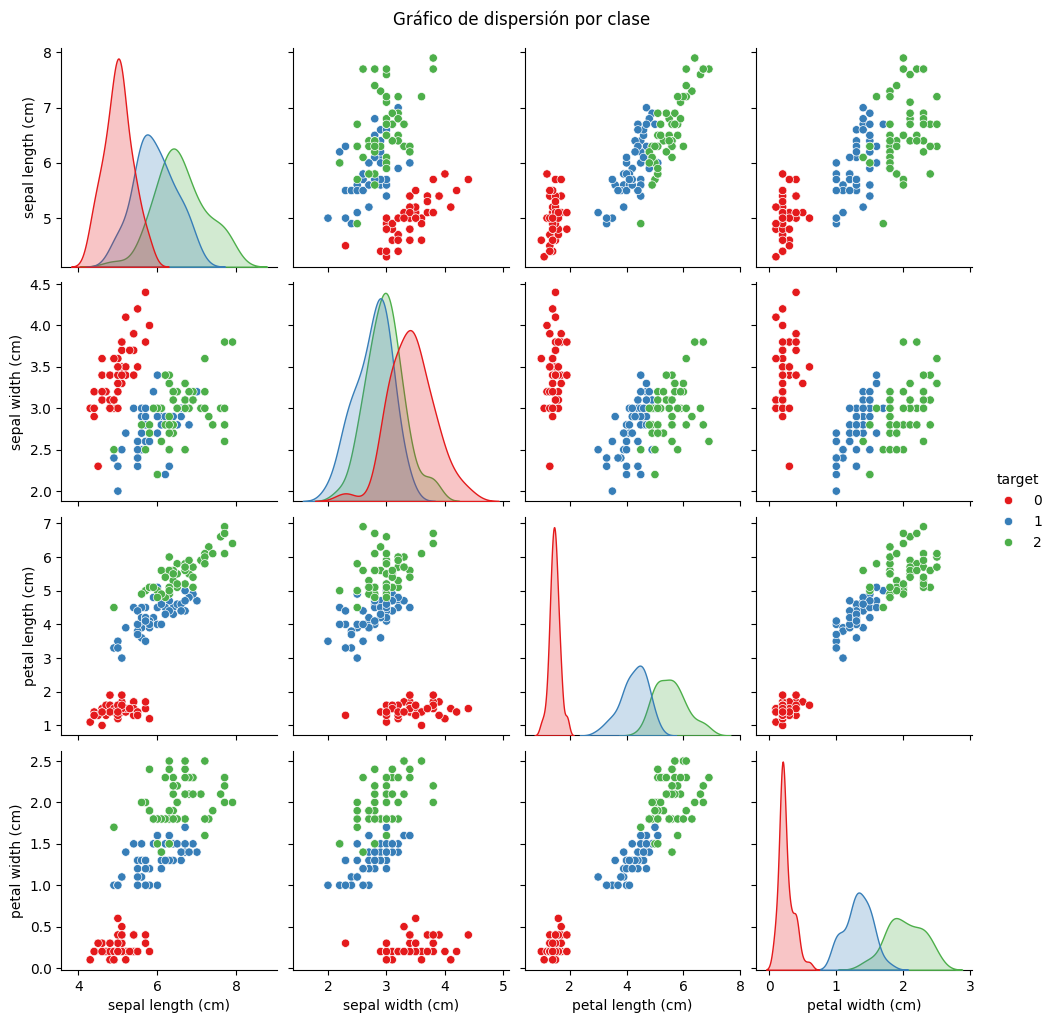

In [1]:
####Preprocesamiento

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Cargar dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Estadísticas básicas
print("Estadísticas descriptivas:")
print(df.describe())

# Gráfico de dispersión
sns.pairplot(df, hue='target', palette='Set1')
plt.suptitle("Gráfico de dispersión por clase", y=1.02)
plt.show()


In [2]:
#####Feature Engineering

# Selección de características
X = df[iris.feature_names]  # Variables predictoras
y = df['target']            # Variable objetivo

# División de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
#####Prediction

from sklearn.neighbors import KNeighborsClassifier

# Crear y entrenar el modelo
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Función de predicción
def predecir_clase(patron):
    pred = knn.predict([patron])
    clase = iris.target_names[pred[0]]
    print(f"Clase predicha: {clase}")

# Ejemplo de uso
patron_nuevo = [5.1, 3.5, 1.4, 0.2]
predecir_clase(patron_nuevo)

Clase predicha: setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


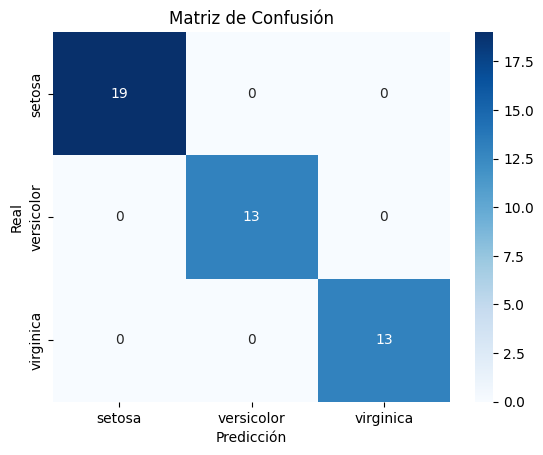

Precisión del modelo (Accuracy): 1.00


In [4]:
#####Model evaluation

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Predicciones
y_pred = knn.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo (Accuracy): {acc:.2f}")


**Bibliografía**
- Estudyando. (s.f.). ¿Qué es el algoritmo KNN?. https://estudyando.com/que-es-el-algoritmo-knn/
- Panama Hitek. (2019, 5 de febrero). Modelado matemático del algoritmo KNN (K-Nearest Neighbors). https://panamahitek.com/modelado-matematico-del-algoritmo-knn-k-nearest-neighbors/
- CDR Book. (s.f.). Clasificador k-vecinos más próximos. En Fundamentos de Ciencia de Datos con R. https://cdr-book.github.io/cap-knn.html
- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825–2830. http://jmlr.org/papers/v12/pedregosa11a.html
